## Load and prepare datasets

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
# from sklearn.preprocessing import normalize 
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
# Load the datasets back from CSV files

period_names = ['1970-1979', '1980-1989', '1990-1999', '2000-2009', '2010-2020']
loaded_datasets = {}

for period_name in period_names:
    loaded_datasets[period_name] = pd.read_csv(f"datasets/climate_features_{period_name}.csv")
    print(f"Loaded climate_features_{period_name}.csv with shape {loaded_datasets[period_name].shape}")

Loaded climate_features_1970-1979.csv with shape (58, 50)
Loaded climate_features_1980-1989.csv with shape (58, 50)
Loaded climate_features_1990-1999.csv with shape (58, 50)
Loaded climate_features_2000-2009.csv with shape (58, 50)
Loaded climate_features_2010-2020.csv with shape (58, 50)


In [19]:
def get_coordinates(df):
    return df[['latitude', 'longitude']]

def get_climate_features(df):
    return df.drop(columns=['latitude', 'longitude'])

In [20]:
# old code for normalization
# ds_70_norm =  normalize(ds_70, axis=0)

In [21]:
datasets = {}

for period_name in period_names:
    datasets[period_name] = get_climate_features(loaded_datasets[period_name])

In [22]:
display(datasets['1970-1979'].head())

,sf_jan,sf_feb,sf_mar,sf_apr,sf_may,sf_jun,sf_jul,sf_aug,sf_sep,sf_oct,...,si10_mar,si10_apr,si10_may,si10_jun,si10_jul,si10_aug,si10_sep,si10_oct,si10_nov,si10_dec
0,0.000003,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,2.590315,2.754211,2.430504,2.676228,2.746363,2.569853,2.357226,2.120899,2.186576,2.403610
1,0.000003,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,2.590315,2.754211,2.430504,2.676228,2.746363,2.569853,2.357226,2.120899,2.186576,2.403610
2,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,7.159504,7.126379,5.361705,4.849958,4.529420,4.284868,4.881127,5.843067,6.624003,6.863742
3,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,5.474470,5.122302,5.014000,4.760554,4.513916,4.431889,4.744140,5.122144,5.027225,5.288669
4,0.000060,0.00001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000049,...,2.867341,2.609093,2.295006,2.434040,2.649830,2.830254,2.705249,2.922193,2.722001,2.780026


## Features variance

In [23]:
def calculate_feature_statistics(df):
    stats = {}
    for column in df.columns:
        stats[column] = {
            'mean': df[column].mean(),
            'median': df[column].median(),
            'std_dev': df[column].std(),
            'min': df[column].min(),
            'max': df[column].max(),
            'variance': df[column].var()
        }
    result = pd.DataFrame(stats).T
    
    # Formater toutes les colonnes numériques
    return result.style.format('{:.10f}')

In [69]:
calculate_feature_statistics(datasets['1970-1979'])

,mean,median,std_dev,min,max,variance
sf_jan,0.0007413001,0.0005973578,0.0007034149,0.0000000000,0.0035552024,0.0000004948
sf_feb,0.0006029129,0.0004475832,0.0006007642,0.0000000000,0.0024347783,0.0000003609
sf_mar,0.0003328845,0.0001160741,0.0005845505,0.0000000000,0.0029183864,0.0000003417
sf_apr,0.0000561069,0.0000029087,0.0001932497,0.0000000000,0.0013403178,0.0000000373
sf_may,0.0000045813,0.0000000000,0.0000182905,0.0000000000,0.0001099825,0.0000000003
sf_jun,0.0000002006,0.0000000000,0.0000011038,0.0000000000,0.0000072479,0.0000000000
sf_jul,0.0000009405,0.0000000000,0.0000043990,0.0000000000,0.0000285864,0.0000000000
sf_aug,0.0000109266,0.0000000000,0.0000370718,0.0000000000,0.0002077580,0.0000000014
sf_sep,0.0001335506,0.0000180006,0.0002547202,0.0000000000,0.0011830807,0.0000000649
sf_oct,0.0004746684,0.0002891064,0.0005840235,0.0000000000,0.0029492856,0.0000003411


## Remove highly correlated features

In [25]:
def display_correlation_matrix(df):
    display(df.corr())

In [26]:
display_correlation_matrix(datasets['1970-1979'])

,sf_jan,sf_feb,sf_mar,sf_apr,sf_may,sf_jun,sf_jul,sf_aug,sf_sep,sf_oct,...,si10_mar,si10_apr,si10_may,si10_jun,si10_jul,si10_aug,si10_sep,si10_oct,si10_nov,si10_dec
sf_jan,1.000000,0.942980,0.877266,0.590184,0.642844,0.547008,0.568799,0.740556,0.869969,0.935427,...,-0.172972,-0.205536,-0.217312,-0.191868,-0.238981,-0.186217,-0.132503,-0.127031,-0.133823,-0.129802
sf_feb,0.942980,1.000000,0.909286,0.663779,0.671335,0.543063,0.559189,0.699996,0.878949,0.931745,...,-0.227939,-0.261280,-0.268495,-0.244118,-0.291695,-0.233404,-0.181440,-0.179900,-0.186763,-0.181215
sf_mar,0.877266,0.909286,1.000000,0.772153,0.844369,0.704247,0.688860,0.840157,0.916865,0.886375,...,-0.164689,-0.195387,-0.208611,-0.190943,-0.231121,-0.181069,-0.154713,-0.144650,-0.140181,-0.127111
sf_apr,0.590184,0.663779,0.772153,1.000000,0.935952,0.877458,0.852528,0.868466,0.675368,0.518018,...,-0.084924,-0.106929,-0.125339,-0.119950,-0.147280,-0.105320,-0.110386,-0.084141,-0.087225,-0.076881
sf_may,0.642844,0.671335,0.844369,0.935952,1.000000,0.932251,0.846984,0.922694,0.742681,0.586109,...,-0.121209,-0.144779,-0.161213,-0.159475,-0.179697,-0.144112,-0.146155,-0.120395,-0.118257,-0.105890
sf_jun,0.547008,0.543063,0.704247,0.877458,0.932251,1.000000,0.918445,0.922550,0.623863,0.476969,...,-0.208327,-0.221292,-0.223526,-0.234510,-0.246136,-0.223524,-0.213783,-0.200806,-0.194425,-0.190846
sf_jul,0.568799,0.559189,0.688860,0.852528,0.846984,0.918445,1.000000,0.894275,0.626297,0.487366,...,-0.233297,-0.245062,-0.251139,-0.263257,-0.276943,-0.256371,-0.242983,-0.229241,-0.222673,-0.220675
sf_aug,0.740556,0.699996,0.840157,0.868466,0.922694,0.922550,0.894275,1.000000,0.791912,0.683362,...,-0.131148,-0.155131,-0.169617,-0.163834,-0.200758,-0.158143,-0.153187,-0.129761,-0.133035,-0.123248
sf_sep,0.869969,0.878949,0.916865,0.675368,0.742681,0.623863,0.626297,0.791912,1.000000,0.921979,...,-0.124477,-0.158047,-0.174755,-0.150677,-0.196079,-0.142474,-0.117242,-0.098959,-0.107694,-0.096501
sf_oct,0.935427,0.931745,0.886375,0.518018,0.586109,0.476969,0.487366,0.683362,0.921979,1.000000,...,-0.173464,-0.205818,-0.214783,-0.188146,-0.241493,-0.186844,-0.136247,-0.130352,-0.139938,-0.134535


In [76]:
def remove_highly_correlated_features(df, threshold=0.8):
    corr_matrix = df.corr().abs()
    upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)]
    reduced_df = df.drop(columns=to_drop)

    print(f"Removed {len(to_drop)} features due to high correlation (> {threshold})")
    print("Features removed:", to_drop)
    print("Features retained:", reduced_df.columns.tolist())
    print("New shape of the dataset:", reduced_df.shape)

    plt.figure(figsize=(7,3))
    sns.heatmap(reduced_df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
    plt.title("Correlation Matrix after Removing Highly Correlated Features")
    plt.show()

    return reduced_df
    

Processing period: 1970-1979
Removed 41 features due to high correlation (> 0.8)
Features removed: ['sf_feb', 'sf_mar', 'sf_may', 'sf_jun', 'sf_jul', 'sf_aug', 'sf_sep', 'sf_oct', 'sf_nov', 'sf_dec', 't2m_feb', 't2m_mar', 't2m_apr', 't2m_may', 't2m_jun', 't2m_jul', 't2m_aug', 't2m_sep', 't2m_oct', 't2m_nov', 't2m_dec', 'tp_feb', 'tp_mar', 'tp_may', 'tp_jun', 'tp_jul', 'tp_sep', 'tp_oct', 'tp_nov', 'tp_dec', 'si10_feb', 'si10_mar', 'si10_apr', 'si10_may', 'si10_jun', 'si10_jul', 'si10_aug', 'si10_sep', 'si10_oct', 'si10_nov', 'si10_dec']
Features retained: ['sf_jan', 'sf_apr', 't2m_jan', 'tp_jan', 'tp_apr', 'tp_aug', 'si10_jan']
New shape of the dataset: (58, 7)


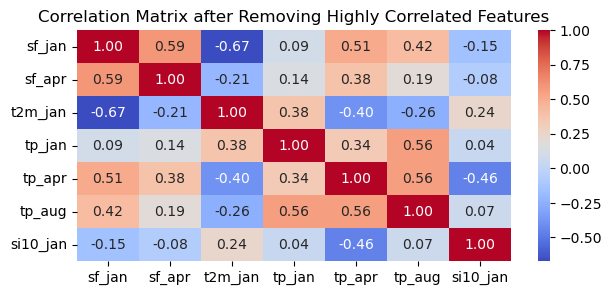

Processing period: 1980-1989
Removed 43 features due to high correlation (> 0.8)
Features removed: ['sf_feb', 'sf_mar', 'sf_apr', 'sf_may', 'sf_jun', 'sf_jul', 'sf_aug', 'sf_sep', 'sf_oct', 'sf_nov', 'sf_dec', 't2m_feb', 't2m_mar', 't2m_apr', 't2m_may', 't2m_jun', 't2m_jul', 't2m_aug', 't2m_sep', 't2m_oct', 't2m_nov', 't2m_dec', 'tp_feb', 'tp_apr', 'tp_may', 'tp_jun', 'tp_jul', 'tp_aug', 'tp_sep', 'tp_oct', 'tp_nov', 'tp_dec', 'si10_feb', 'si10_mar', 'si10_apr', 'si10_may', 'si10_jun', 'si10_jul', 'si10_aug', 'si10_sep', 'si10_oct', 'si10_nov', 'si10_dec']
Features retained: ['sf_jan', 't2m_jan', 'tp_jan', 'tp_mar', 'si10_jan']
New shape of the dataset: (58, 5)


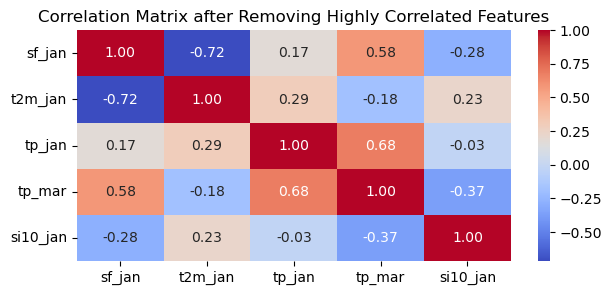

Processing period: 1990-1999
Removed 39 features due to high correlation (> 0.8)
Features removed: ['sf_feb', 'sf_mar', 'sf_apr', 'sf_may', 'sf_jul', 'sf_aug', 'sf_sep', 'sf_oct', 'sf_nov', 'sf_dec', 't2m_feb', 't2m_mar', 't2m_apr', 't2m_may', 't2m_jun', 't2m_jul', 't2m_aug', 't2m_sep', 't2m_oct', 't2m_nov', 't2m_dec', 'tp_feb', 'tp_may', 'tp_jun', 'tp_jul', 'tp_oct', 'tp_nov', 'tp_dec', 'si10_feb', 'si10_mar', 'si10_apr', 'si10_may', 'si10_jun', 'si10_jul', 'si10_aug', 'si10_sep', 'si10_oct', 'si10_nov', 'si10_dec']
Features retained: ['sf_jan', 'sf_jun', 't2m_jan', 'tp_jan', 'tp_mar', 'tp_apr', 'tp_aug', 'tp_sep', 'si10_jan']
New shape of the dataset: (58, 9)


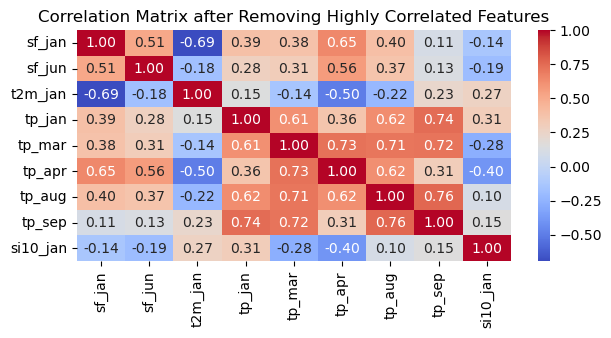

Processing period: 2000-2009
Removed 41 features due to high correlation (> 0.8)
Features removed: ['sf_feb', 'sf_mar', 'sf_apr', 'sf_may', 'sf_jun', 'sf_jul', 'sf_sep', 'sf_oct', 'sf_nov', 'sf_dec', 't2m_feb', 't2m_mar', 't2m_apr', 't2m_may', 't2m_jun', 't2m_jul', 't2m_aug', 't2m_sep', 't2m_oct', 't2m_nov', 't2m_dec', 'tp_feb', 'tp_mar', 'tp_may', 'tp_jun', 'tp_jul', 'tp_aug', 'tp_oct', 'tp_nov', 'tp_dec', 'si10_feb', 'si10_mar', 'si10_apr', 'si10_may', 'si10_jun', 'si10_jul', 'si10_aug', 'si10_sep', 'si10_oct', 'si10_nov', 'si10_dec']
Features retained: ['sf_jan', 'sf_aug', 't2m_jan', 'tp_jan', 'tp_apr', 'tp_sep', 'si10_jan']
New shape of the dataset: (58, 7)


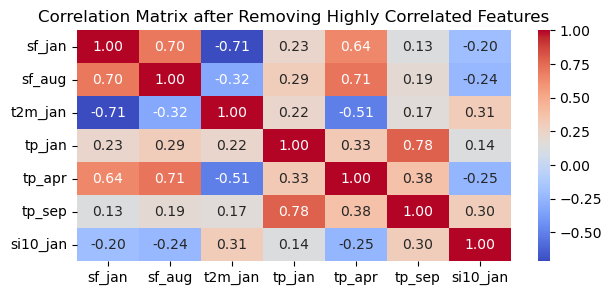

Processing period: 2010-2020
Removed 40 features due to high correlation (> 0.8)
Features removed: ['sf_feb', 'sf_mar', 'sf_may', 'sf_jun', 'sf_aug', 'sf_sep', 'sf_oct', 'sf_nov', 'sf_dec', 't2m_feb', 't2m_mar', 't2m_apr', 't2m_may', 't2m_jun', 't2m_jul', 't2m_aug', 't2m_sep', 't2m_oct', 't2m_nov', 't2m_dec', 'tp_feb', 'tp_mar', 'tp_may', 'tp_jun', 'tp_jul', 'tp_sep', 'tp_oct', 'tp_nov', 'tp_dec', 'si10_feb', 'si10_mar', 'si10_apr', 'si10_may', 'si10_jun', 'si10_jul', 'si10_aug', 'si10_sep', 'si10_oct', 'si10_nov', 'si10_dec']
Features retained: ['sf_jan', 'sf_apr', 'sf_jul', 't2m_jan', 'tp_jan', 'tp_apr', 'tp_aug', 'si10_jan']
New shape of the dataset: (58, 8)


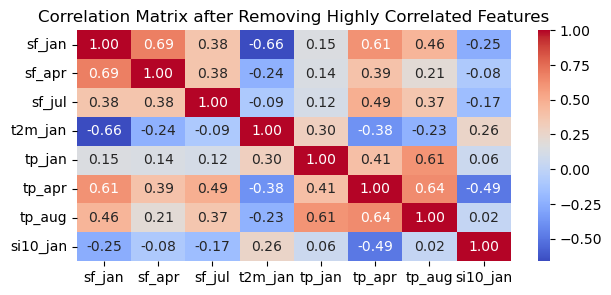

In [77]:
reduced_ds = {}

for period_name in period_names:
    print(f"Processing period: {period_name}")
    reduced_ds[period_name] = remove_highly_correlated_features(datasets[period_name], threshold=0.8)

In [61]:
reduced_70 = reduced_ds['1970-1979']
reduced_70.head()

,sf_jan,sf_apr,t2m_jan,tp_jan,tp_apr,tp_aug,si10_jan
0,0.000003,0.0,283.75577,0.001881,0.000894,0.000180,2.474160
1,0.000003,0.0,283.75577,0.001881,0.000894,0.000180,2.474160
2,0.000000,0.0,287.00555,0.002240,0.000283,0.000985,7.052627
3,0.000000,0.0,286.15518,0.002719,0.001201,0.000724,5.345498
4,0.000060,0.0,281.88153,0.002241,0.000788,0.000438,2.885952


## PCA

In [31]:
import numpy as np
from matplotlib import pyplot as pl
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

In [41]:
def compute_pca(df):
    # Normalize the data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df)

    # Apply PCA
    pca = PCA(n_components=df.shape[1])
    pca.fit(scaled_data)
    return pca, scaled_data

def display_pca_variance(pca):
    pl.figure(figsize=(8,3))
    pl.subplot(1,2,1)
    pl.bar(np.arange(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_)
    pl.ylim(0.0, 0.4)
    pl.title('Explained variance')
    pl.xlabel('Index of eigenvector')
    pl.ylabel('Explained variance')
    pl.grid()
    pl.subplot(1,2,2)
    pl.bar(np.arange(len(pca.explained_variance_ratio_)), 100*np.cumsum(pca.explained_variance_ratio_))
    pl.ylim(0.0, 100)
    pl.title('Percent of explained variance')
    pl.xlabel('Index of eigenvector')
    pl.ylabel('Explained variance [%]')
    pl.grid()
    pl.tight_layout()

In [62]:
pcas = {}
scaled_ds = {}

for period_name in period_names:
    pca, scaled_data = compute_pca(reduced_ds[period_name])
    pcas[period_name] = pca
    scaled_ds[period_name] = scaled_data

PCA Explained Variance for period: 1970-1979
PCA Explained Variance for period: 1980-1989
PCA Explained Variance for period: 1990-1999
PCA Explained Variance for period: 2000-2009
PCA Explained Variance for period: 2010-2020


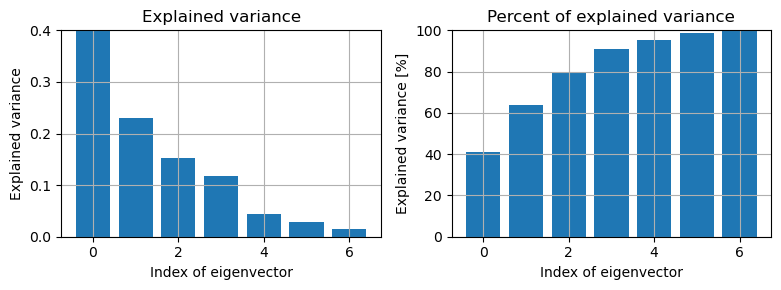

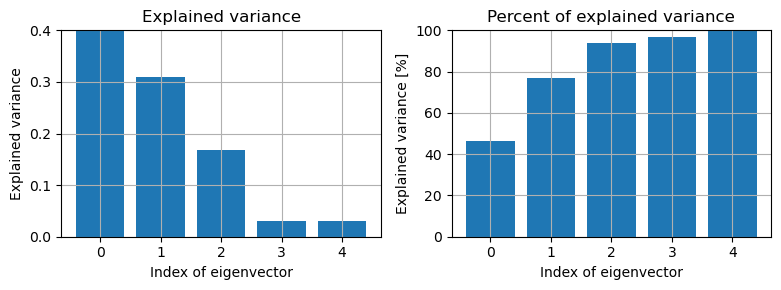

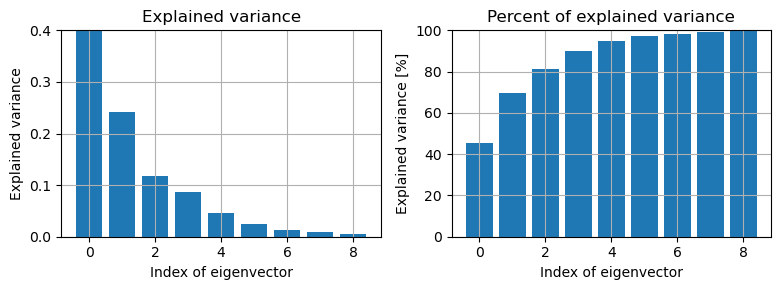

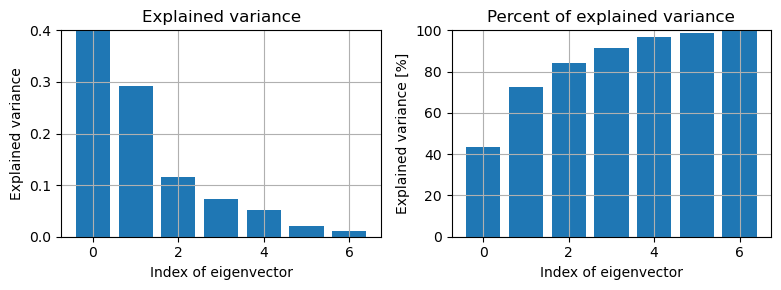

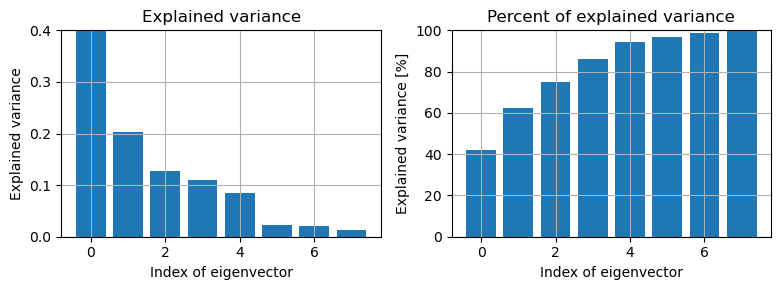

In [63]:
for period_name in period_names:
    print(f"PCA Explained Variance for period: {period_name}")
    display_pca_variance(pcas[period_name])

In [64]:
pca_70 = pcas['1970-1979']
scaled_70 = scaled_ds['1970-1979']

n_components_to_show = 3

loadings = pd.DataFrame(
    pca_70.components_[:n_components_to_show],
    columns=reduced_70.columns,
    index=[f'PC{i+1}' for i in range(n_components_to_show)]
)

print("Loadings des composantes principales:")
display(loadings)

Loadings des composantes principales:


,sf_jan,sf_apr,t2m_jan,tp_jan,tp_apr,tp_aug,si10_jan
PC1,0.500358,0.366155,-0.371761,0.181574,0.493476,0.397696,-0.206678
PC2,-0.171179,-0.024506,0.494257,0.699089,0.086437,0.405883,0.254695
PC3,0.293182,0.284487,-0.160406,-0.130549,-0.342437,0.125147,0.810811


In [88]:
def find_nb_min_components_for_variance(pca, target_explained_variance=0.9):
    cummulated_variance = np.cumsum(pca.explained_variance_ratio_)
    min_index = np.sum(cummulated_variance < target_explained_variance)

    return min_index + 1

def project_data_pca(df_scaled, pca, n_components, target_explained_variance=0.9):
    cummulated_variance = np.cumsum(pca.explained_variance_ratio_)
    min_index = n_components - 1

    print('The projection will try to keep', target_explained_variance*100, '% of the variance')
    print(min_index + 1, 'eigenvectors are needed')
    print('Keeping', cummulated_variance[min_index]*100, '% of the variance')

    projected = PCA(n_components = min_index+1).fit_transform(df_scaled)

    return projected

def add_coordinates_to_df(df, coordinates):
    return pd.concat([coordinates, df], axis=1)

In [91]:
min_components_needed = 0

for period_name in period_names:
    n_components = find_nb_min_components_for_variance(pcas[period_name], target_explained_variance=0.9)
    if n_components > min_components_needed:
        min_components_needed = n_components

print("Minimum number of components needed across all periods to retain 90% variance:", min_components_needed)

Minimum number of components needed across all periods to retain 90% variance: 5


In [93]:
projected_ds = {}

for period_name in period_names:
    print(f"Projecting data for period: {period_name}")
    projected_ds[period_name] = project_data_pca(scaled_ds[period_name], pcas[period_name], min_components_needed, target_explained_variance=0.9)
    print("\n")

Projecting data for period: 1970-1979
The projection will try to keep 90.0 % of the variance
5 eigenvectors are needed
Keeping 95.53548184817626 % of the variance


Projecting data for period: 1980-1989
The projection will try to keep 90.0 % of the variance
5 eigenvectors are needed
Keeping 100.0 % of the variance


Projecting data for period: 1990-1999
The projection will try to keep 90.0 % of the variance
5 eigenvectors are needed
Keeping 94.67804960602236 % of the variance


Projecting data for period: 2000-2009
The projection will try to keep 90.0 % of the variance
5 eigenvectors are needed
Keeping 96.75855329552948 % of the variance


Projecting data for period: 2010-2020
The projection will try to keep 90.0 % of the variance
5 eigenvectors are needed
Keeping 94.33949942272403 % of the variance




In [94]:
final_ds = {}

for period_name in period_names:
    print(f"Finalizing dataset for period: {period_name}")
    projected = projected_ds[period_name]
    final_ds[period_name] = add_coordinates_to_df(pd.DataFrame(projected), get_coordinates(loaded_datasets[period_name]))

Finalizing dataset for period: 1970-1979
Finalizing dataset for period: 1980-1989
Finalizing dataset for period: 1990-1999
Finalizing dataset for period: 2000-2009
Finalizing dataset for period: 2010-2020


In [95]:
final_70 = final_ds['1970-1979']
final_70.head()

,latitude,longitude,0,1,2,3,4
0,35.25,33.25,-2.685183,-0.341353,-0.930916,1.458443,-0.510552
1,35.25,33.25,-2.685183,-0.341353,-0.930916,1.458443,-0.510552
2,36.00,14.50,-3.278969,0.963117,0.963407,1.069825,-0.257722
3,36.25,-5.25,-2.627178,0.944883,-0.056300,1.227654,-0.168542
4,38.00,23.75,-2.456299,-0.168336,-0.669463,1.215616,-0.678508


## Find closest city

In [45]:
from sklearn.metrics.pairwise import euclidean_distances

In [112]:
def find_closest_city(distance_function, target_ds, current_ds, current_city):
    target_city_coords = current_ds[(current_ds['latitude'] == current_city[0]) & (current_ds['longitude'] == current_city[1])]

    if target_city_coords.empty:
        raise ValueError("Target city not found in the target dataset.")
    target_features = target_city_coords.iloc[0, 2:].values  # Exclude latitude and longitude

    min_distance = float('inf')
    closest_city = None

    for _, row in target_ds.iterrows():
        source_city_coords = row[['latitude', 'longitude']].values
        source_features = row.iloc[2:].values  # Exclude latitude and longitude

        distance = distance_function([source_features], [target_features])

        if distance < min_distance:
            min_distance = distance
            closest_city = source_city_coords

    return closest_city
    

In [79]:
bern = (47, 7.5)

In [113]:
find_closest_city(euclidean_distances, final_ds['1970-1979'], final_ds['2010-2020'], bern)

array([47. ,  7.5])

In [124]:
coordinates = get_coordinates(loaded_datasets['2010-2020'])
cities = pd.DataFrame(columns=['latitude_2010', 'longitude_2010', 'latitude_1970', 'longitude_1970'])

for lat, long in coordinates.values:
    closest_city = find_closest_city(euclidean_distances, final_ds['1970-1979'], final_ds['2010-2020'], (lat, long))
    new_row = pd.DataFrame([[lat, long, closest_city[0], closest_city[1]]], 
                          columns=['latitude_2010', 'longitude_2010', 'latitude_1970', 'longitude_1970'])
    cities = pd.concat([cities, new_row], ignore_index=True)

C:\Users\evara\AppData\Local\Temp\ipykernel_1380\62917592.py:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  cities = pd.concat([cities, new_row], ignore_index=True)


In [130]:
# add cities name to the dataframe
eu_capitals = pd.read_csv("datasets/eu_capitals.csv")
for index, row in cities.iterrows():
    lat_2010 = row['latitude_2010']
    long_2010 = row['longitude_2010']
    city_name_2010 = eu_capitals[(eu_capitals['latitude'] == lat_2010) & (eu_capitals['longitude'] == long_2010)]['name'].values
    if city_name_2010.size > 0:
        cities.at[index, 'city_2010'] = city_name_2010[0]
    else:
        cities.at[index, 'city_2010'] = 'Unknown'

    lat_1970 = row['latitude_1970']
    long_1970 = row['longitude_1970']
    city_name_1970 = eu_capitals[(eu_capitals['latitude'] == lat_1970) & (eu_capitals['longitude'] == long_1970)]['name'].values
    if city_name_1970.size > 0:
        cities.at[index, 'city_1970'] = city_name_1970[0]
    else:
        cities.at[index, 'city_1970'] = 'Unknown'

In [ ]:
display(cities)

,latitude_2010,longitude_2010,latitude_1970,longitude_1970,city_2010,city_1970
0,35.25,33.25,38.00,23.75,Nicosia,Athens
1,35.25,33.25,38.00,23.75,Nicosia,Athens
2,36.00,14.50,36.00,14.50,Valletta,Valletta
3,36.25,-5.25,36.25,-5.25,Gibraltar,Gibraltar
4,38.00,23.75,38.00,23.75,Athens,Athens
5,38.75,-9.25,38.75,-9.25,Lisbon,Lisbon
6,40.00,32.75,40.00,32.75,Ankara,Ankara
7,40.25,44.50,40.25,44.50,Yerevan,Yerevan
8,40.50,-3.75,40.50,-3.75,Madrid,Madrid
9,40.50,45.00,41.75,44.75,Unknown,Tbilisi
